# Data Visualization Final Project



The students who contributed to this notebook are Guli Aminjonova, Jane Chiriyankandath, Mary Nshikokola, and Maria Velazquez.

In [28]:
# Importing libraries
import pandas as pd 
import numpy as np
import statsmodels.api as sm 
from statsmodels.formula.api import logit, probit, poisson, ols
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.preprocessing import LabelBinarizer
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [29]:
# Reading in the data
df = pd.read_csv('bestsellers with categories.csv')
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


### EDA

In [37]:
# Getting summary statistics 
df.describe()

,User_Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


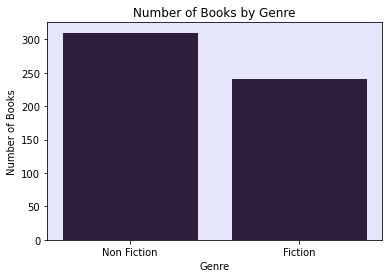

In [67]:
# Count the number of books in each genre
genre_counts = df['Genre'].value_counts()

# Create a bar plot
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.title('Number of Books by Genre')

# Display the plot
plt.show()


The dataset contains a larger number of non-fiction books compared to fiction books.

In [33]:
# Renaming columns
df=df.rename(columns={'User Rating': 'User_Rating','Author Gropued By Reviews': 'Author_Reviews', \
                   'Author Grouped By User Rating':'Author_Rating' })

In [36]:
# Checking for duplicates
duplicates = df.duplicated()
if duplicates.any():
    print("Duplicates found in the dataset.")
else:
    print("No duplicates found in the dataset.")

No duplicates found in the dataset.


In [46]:
# Count the number of occurrences for each book and year combination
book_year_counts = df.groupby(['Name', 'Year']).size()

# Filter the books that have more than one occurrence
repeated_books = book_year_counts[book_year_counts > 1]

# Display the repeated books and their count with the corresponding years
for book, count in repeated_books.items():
    book_name = book[0]
    year = book[1]
    print(f"Book: {book_name}, Repeated {count} times in Year: {year}")


Book: The Fault in Our Stars, Repeated 2 times in Year: 2014
Book: The Help, Repeated 2 times in Year: 2011
Book: Unbroken: A World War II Story of Survival, Resilience, and Redemption, Repeated 2 times in Year: 2014


Upon further analysis, it has come to our attention that certain books are listed twice in the dataset as best-selling in the same year. While checking for duplicates, these particular records were not identified. It is possible that these instances could be genuine cases where the books achieved significant sales milestones multiple times within the same year. However, it is also plausible that these duplications are errors or inconsistencies within the dataset. Further investigation and verification are recommended to determine the accuracy and validity of these records.

In [54]:
duplicate_books = df[df.duplicated(subset='Name', keep=False)]
duplicate_books = duplicate_books.sort_values('Name')

if len(duplicate_books) > 0:
    print("The following books have appeared more than once in different years:")
    top_books = duplicate_books['Name'].value_counts().reset_index()
    top_books.columns = ['Book Name', 'Count']
    top_books = top_books.head(5)
    print(top_books)
else:
    print("No books have appeared more than once in different years.")


The following books have appeared more than once in different years:
                                           Book Name  Count
0  Publication Manual of the American Psychologic...     10
1                                StrengthsFinder 2.0      9
2                          Oh, the Places You'll Go!      8
3  The 7 Habits of Highly Effective People: Power...      7
4                        The Very Hungry Caterpillar      7


These books have gained significant popularity and recognition over time, consistently appearing as bestsellers in multiple years. The count shows us how many times these books have appeared as bestsellers.

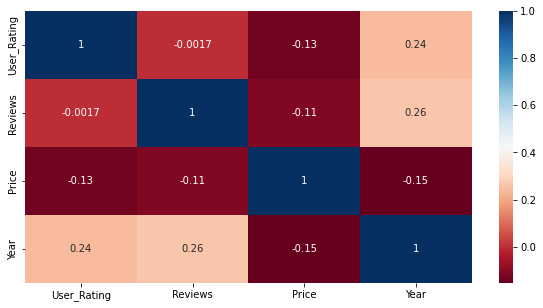

In [38]:
# Seeing how correlated our variables are to one another
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, ax=ax, cmap='RdBu')
plt.show()

None of our variables appear to be strongly correlated either negatively or positively.

### Researh Question 1

### What is the most popular book genre, and how has the popularity of different book genres changed over time?

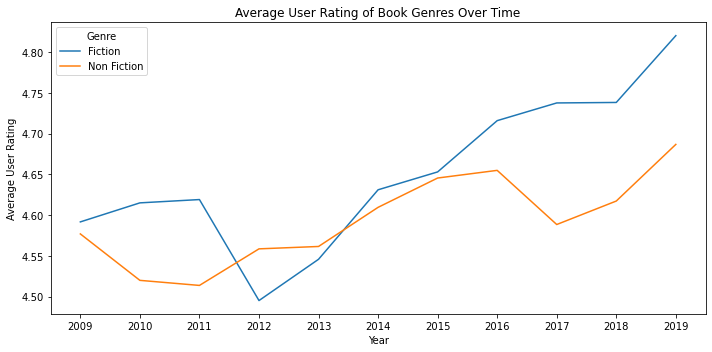

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

genre_popularity = df.groupby(['Genre', 'Year']).agg({'User Rating': 'mean'}).reset_index()

genres = genre_popularity['Genre'].unique()

fig, ax = plt.subplots(figsize=(10, 5))

for genre in genres:
    genre_data = genre_popularity[genre_popularity['Genre'] == genre]
    ax.plot(genre_data['Year'], genre_data['User Rating'], label=genre)

ax.set_xticks(genre_popularity['Year'].unique())
ax.set_xlabel('Year')
ax.set_ylabel('Average User Rating')
ax.legend(title='Genre')
plt.title('Average User Rating of Book Genres Over Time')

plt.tight_layout()
plt.show()


### Research Question 1 Answer:

The dataset primarily consists of two genres: Fiction and Non-Fiction. Upon analyzing the average user ratings, it becomes apparent that Fictional books tend to be more popular and receive higher ratings from users.

Examining the data across different years, from 2009 to 2019, we observe that Fictional books consistently maintain higher average user ratings compared to Non-Fictional books. However, it is worth noting that there are two exceptions to this trend, which occurred in the years 2012 and 2013.

Overall, the data suggests a clear preference for Fictional books, as they consistently receive higher average user ratings over time, with the only deviations occurring in the specific years of 2012 and 2013.

### Research Question 2:

### Are there certain authors that consistently appear in the bestselling books list? 


In [11]:
# Authors with the most Fiction and Non-Fiction book sales
fiction_df = df[df['Genre'] == 'Fiction']
nonfiction_df = df[df['Genre'] == 'Non Fiction']
fiction_authors = fiction_df['Author'].value_counts()
nonfiction_authors = nonfiction_df['Author'].value_counts()
most_fiction_author = fiction_authors.idxmax()
most_nonfiction_author = nonfiction_authors.idxmax()
print("The author with the most books in the fiction genre is:", most_fiction_author)
print("The author with the most books in the non-fiction genre is:", most_nonfiction_author)

The author with the most books in the fiction genre is: Jeff Kinney
The author with the most books in the non-fiction genre is: Gary Chapman


In [66]:
fiction_books_by_author = df[df['Author'] == most_fiction_author]
nonfiction_books_by_author = df[df['Author'] == most_nonfiction_author]

print("The author with the most books in the fiction genre is:", most_fiction_author)
print("Books written by the top fiction author:")

#Set the display options to show the full book name
pd.set_option('display.max_colwidth', None)
fiction_books_df = fiction_books_by_author[['Name', 'Year']]
fiction_books_df.columns = ['Book Name', 'Year']
fiction_books_df

The author with the most books in the fiction genre is: Jeff Kinney
Books written by the top fiction author:


,Book Name,Year
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",2011
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",2013
72,Diary of a Wimpy Kid: The Last Straw (Book 3),2009
73,Diary of a Wimpy Kid: The Long Haul,2014
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volume 4)",2009
88,Double Down (Diary of a Wimpy Kid #11),2016
253,Old School (Diary of a Wimpy Kid #10),2015
381,The Getaway,2017
435,The Meltdown (Diary of a Wimpy Kid Book 13),2018
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",2012


In [65]:
print("\nThe author with the most books in the non-fiction genre is:", most_nonfiction_author)
print("Books written by the top non-fiction author:")

#Set the display options to show the full book name
pd.set_option('display.max_colwidth', None)
nonfiction_books_df = nonfiction_books_by_author[['Name', 'Year']]
nonfiction_books_df.columns = ['Book Name', 'Year']
nonfiction_books_df


The author with the most books in the non-fiction genre is: Gary Chapman
Books written by the top non-fiction author:


,Book Name,Year
320,The 5 Love Languages: The Secret to Love That Lasts,2010
321,The 5 Love Languages: The Secret to Love That Lasts,2011
322,The 5 Love Languages: The Secret to Love That Lasts,2012
323,The 5 Love Languages: The Secret to Love That Lasts,2013
324,The 5 Love Languages: The Secret to Love That Lasts,2014
325,The 5 Love Languages: The Secret to Love that Lasts,2015
326,The 5 Love Languages: The Secret to Love that Lasts,2016
327,The 5 Love Languages: The Secret to Love that Lasts,2017
328,The 5 Love Languages: The Secret to Love that Lasts,2018
329,The 5 Love Languages: The Secret to Love that Lasts,2019


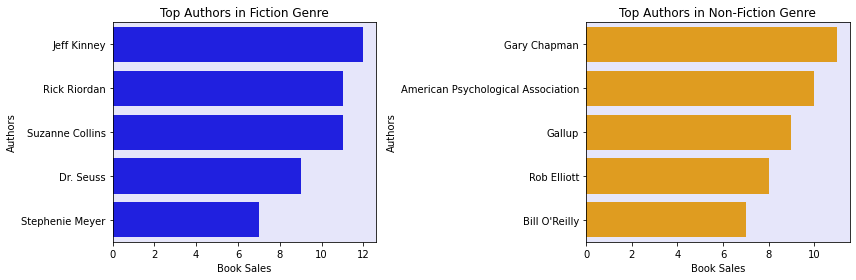

In [39]:
# Define the number of top authors to display
num_top_authors = 5

# Get the top authors and their book counts in the fiction genre
top_fiction_authors = fiction_authors.sort_values(ascending=False).head(num_top_authors)
top_fiction_counts = top_fiction_authors.values

# Get the top authors and their book counts in the non-fiction genre
top_nonfiction_authors = nonfiction_authors.sort_values(ascending=False).head(num_top_authors)
top_nonfiction_counts = top_nonfiction_authors.values

# Create a figure with subplots for fiction and non-fiction genres
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the top authors and their book counts in the fiction genre using Seaborn
sns.barplot(x=top_fiction_counts, y=top_fiction_authors.index, color='blue', ax=ax1)
ax1.set_xlabel('Book Sales')
ax1.set_ylabel('Authors')
ax1.set_title('Top Authors in Fiction Genre')

# Plot the top authors and their book counts in the non-fiction genre using Seaborn
sns.barplot(x=top_nonfiction_counts, y=top_nonfiction_authors.index, color='orange', ax=ax2)
ax2.set_xlabel('Book Sales')
ax2.set_ylabel('Authors')
ax2.set_title('Top Authors in Non-Fiction Genre')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


### Research Question 2 Answer:

The author with the most books in the fiction genre is Jeff Kinney, who has contributed different books or series that appear in the dataset. On the other hand, Gary Chapman is the top author in the non-fiction genre because the same book by him appears multiple times, indicating its continued popularity in that category.

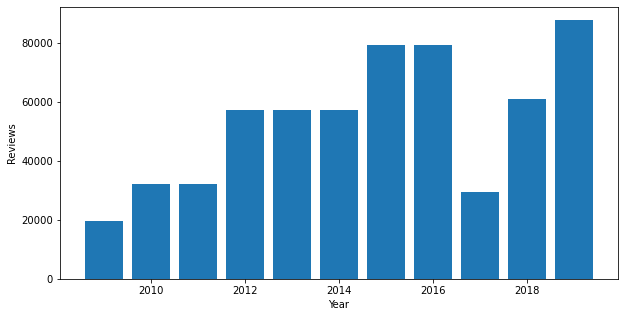

In [20]:
# Bar plot showing the reviews by year 
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(df['Year'], df['Reviews'])

ax.set_xlabel('Year')
ax.set_ylabel('Reviews')

plt.show()

The year with the highest book reviews is 2019 at around 85000 reviews followed by 2016 and 2015 at 80000, with the least reviews being in the year 2009 atabout 20000 reviews.

<AxesSubplot:xlabel='User Rating', ylabel='Count'>

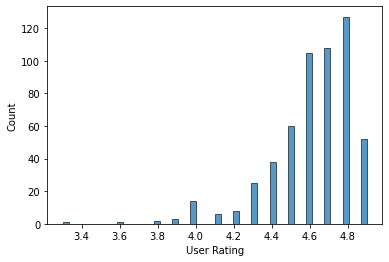

In [22]:
sns.histplot(data=df, x='User Rating', kde=False, bins=50)

The most frequent user rating observed over the yaers is 4.8 with the lowest rate being just below 3.3

From our results, we can see that the Fiction genre is more popular than the Non-Fiction genre

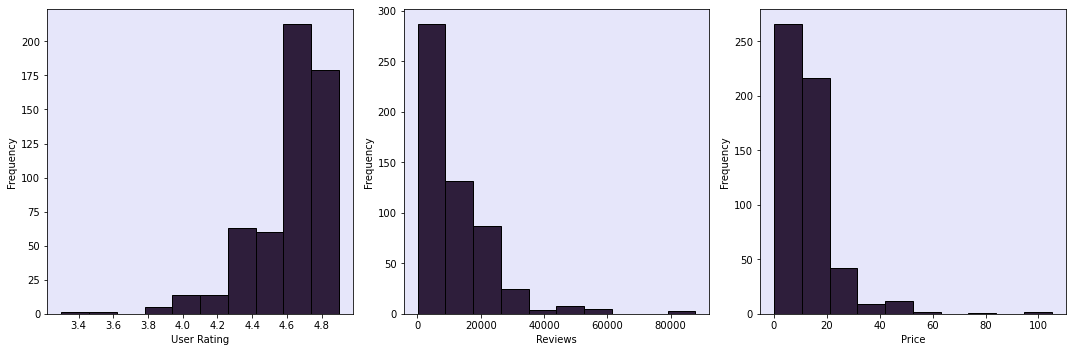

In [43]:
# Specify the numeric variables you want to plot as histograms
numeric_variables = ['User Rating', 'Reviews', 'Price']

# Create subplots with multiple columns
fig, axs = plt.subplots(nrows=1, ncols=len(numeric_variables), figsize=(15, 5))

# Generate histograms for each numeric variable
for i, var in enumerate(numeric_variables):
    axs[i].hist(df[var], bins=10, edgecolor='black')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the histograms
plt.show()

<Figure size 432x288 with 0 Axes>

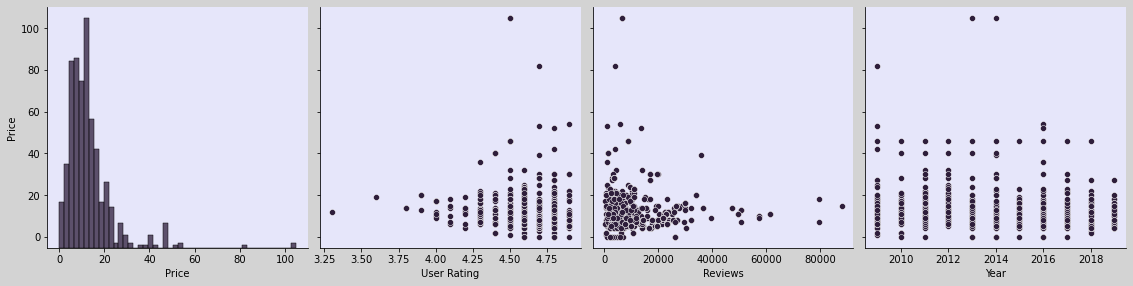

In [26]:
# The relationship between price and numerical variables
df_numeric=df[['Price','User Rating', 'Reviews', 'Year']]

for i in range(0, len(df_numeric.columns), 4):
    plt.suptitle('The relationship between salary and quantitative variables', y=1.10, fontsize='15')
    sns.set_palette("mako")
    #sns.set_style('darkgrid')
    sns.set_style(rc = {'axes.facecolor': '#E6E6FA',  'figure.facecolor': 'lightgrey'})
    sns.pairplot(data=df_numeric,
                x_vars=df_numeric.columns[i:i+4],
                y_vars=['Price'], size=4)
    
    
    
plt.show()

The scatterplots do not reaaly show a distinct relationship between either the User Rating and Price and the User Rating and Reviews

In [46]:
#value counts of categorical variables
df[['Name', 'Author', 'Genre']].describe()

,Name,Author,Genre
count,550,550,550
unique,351,248,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction
freq,10,12,310


### Research Question 3:

### Which variables influence the book price?  


In [47]:
# import packages for splitting data and running linear regression
from sklearn.model_selection import train_test_split # For splitting the data into training/test datasets
import statsmodels.api as sm # For linear regression modeling
from statsmodels.compat import lzip # for additional capabilities like plotting
import statsmodels.formula.api as smf
from sklearn import metrics
import researchpy as rp
import statsmodels.api as sm
import scipy.stats as stats

## 1. Linear Regression with all Independent Variables

In [48]:
# Creating the model 
model1 = smf.ols(formula='Price ~ Author+Name+User_Rating+ Reviews + Year + C(Genre)', data=df).fit()

# Print the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     154.8
Date:                Mon, 29 May 2023   Prob (F-statistic):          2.37e-165
Time:                        13:41:51   Log-Likelihood:                -543.61
No. Observations:                 550   AIC:                             1793.
Df Residuals:                     197   BIC:                             3315.
Df Model:                         352                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================================================================================
                                                                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                                            72.8056     41.168      1.769      0.079      -8.380     153.991
Author[T.Adam Gasiewski]                                                                                                             -2.8065      1.718     -1.634      0.104      -6.194       0.581
Author[T.Adam Mansbach]                                                                                                               4.4415      0.856      5.188      0.000       2.753       6.130
Author[T.Adir Levy]                                                                                                                   7.3761      0.881      8.371      0.000       5.638       9.114
Author[T.Admiral William H. McRaven]                                                                                                 -2.3260      0.926     -2.511      0.013      -4.153      -0.499
Author[T.Adult Coloring Book Designs]                                                                                                -2.3556      1.269     -1.856      0.065      -4.859       0.148
Author[T.Alan Moore]                                                                                                                 24.7968      1.152     21.524      0.000      22.525      27.069
Author[T.Alex Michaelides]                                                                                                           -7.8695      1.088     -7.235      0.000     -10.014      -5.725
Author[T.Alice Schertle]                                                                                                              6.0136      1.340      4.489      0.000       3.372       8.655
Author[T.Allie Brosh]                                                                                                                 4.2376      0.688      6.158      0.000       2.881       5.595
Author[T.American Psychiatric Association]                                                                                           45.2136      0.744     60.777      0.000      43.746      46.681
Author[T.American Psychological Association]                                                                                         14.4369      0.515     28.038      0.000      13.421      15.452
Author[T.Amor Towles]                                                                                            

### Discussion: 
Although this model has a high R-square value, the variables such as "Author" and "Name" have over 250 and 300 categories respectively. This is an issue for the linear regression analysis because it leads to unstable parameter estimates by just increasing the variability, also it causes curse dimensionality and multicollianerity issues. Therefore, we decided to examine our model by eliminating thes two variables first. Next, since "Author" accounts for the highest variability we collapsed the categories of it into smaller categories and examined the model with the variable. 

## 2. Linear Regression without "Author" and "Name"

In [49]:
# Creating the model 
model2 = smf.ols(formula='Price ~ User_Rating+ Reviews + Year + C(Genre)', data=df).fit()

# Print the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     9.432
Date:                Mon, 29 May 2023   Prob (F-statistic):           2.23e-07
Time:                        13:41:51   Log-Likelihood:                -2072.4
No. Observations:                 550   AIC:                             4155.
Df Residuals:                     545   BIC:                             4176.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 928.0401    306.459      3.028      0.003     326.055    1530.025
C(Genre)[T.Non Fiction]     3.6723      0.959      3.830      0.000       1.789       5.556
User_Rating                -3.9176      2.069     -1.893      0.059      -7.982       0.147
Reviews                 -2.579e-05   4.18e-05     -0.617      0.538      -0.000    5.64e-05
Year                       -0.4462      0.153     -2.907      0.004      -0.748      -0.145
==============================================================================
Omnibus:                      478.756   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13555.560
Skew:                           3.737   Prob(JB):                         0.00
Kurtosis:                      26.144   Cond. No.                     1.15e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
#MAE MSE and RMSE for Linear Regression 

# Get the independent variables for prediction
X = df.drop('Price', axis=1)

# Get the predicted values
y_pred = model1.predict(X)

# Get the actual values
y_actual = df['Price']

#  Metrics of model performance
print('MAE :', metrics.mean_absolute_error(y_actual, y_pred))
print('MSE :', metrics.mean_squared_error(y_actual, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))

MAE : 0.10718103505175461
MSE : 0.42269591369697007
RMSE : 0.6501506853776055


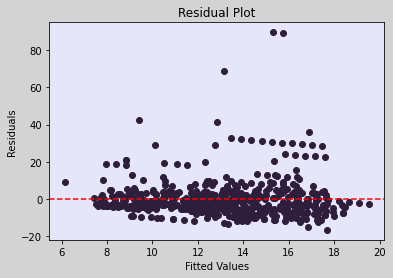

In [51]:
# Calculate the residuals
residuals = model2.resid

# Create the residual plot
plt.scatter(model2.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Discussion: 
Removing "Author" and "Name" (book name) significantly dropped the R-square from 0.996 to 0.065. Since the EDA showed that our target variable and continuous variable were skewed, we decided to run linear regression by tarnsforming these variables and see if that inproves the model

## 3. Linear regression with Log Transfromation


In [52]:
df2=df

In [53]:
# Log-transform numeric variables
# Logarithmic transformation with a constant added
df2['Log_User_Rating'] = np.log(df2['User_Rating'] + 1e-10)
df2['Log_Reviews'] = np.log(df2['Reviews'] + 1e-10)
df2['Log_Price'] = np.log(df2['Price'] + 1e-10)
df2.head(2)

,Name,Author,Author_Reviews,Author_Rating,User_Rating,Reviews,Price,Year,Genre,Log_User_Rating,Log_Reviews,Log_Price
0,10-Day Green Smoothie Cleanse,JJ Smith,Less than 30000,Above 4.5,4.7,17350,8,2016,Non Fiction,1.547563,9.761348,2.079442
1,11/22/63: A Novel,Stephen King,Less than 10000,Above 4.5,4.6,2052,22,2011,Fiction,1.526056,7.626570,3.091042


In [54]:
# Creating the model 
model3 = smf.ols(formula='Log_Price ~ Log_User_Rating+ Log_Reviews + Year + C(Genre)', data=df2).fit()

# Print the model summary
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Price   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     6.899
Date:                Mon, 29 May 2023   Prob (F-statistic):           2.02e-05
Time:                        13:41:53   Log-Likelihood:                -1495.8
No. Observations:                 550   AIC:                             3002.
Df Residuals:                     545   BIC:                             3023.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 131.2047    112.755      1.164      0.245     -90.283     352.692
C(Genre)[T.Non Fiction]     1.4749      0.340      4.338      0.000       0.807       2.143
Log_User_Rating            -7.3662      3.176     -2.319      0.021     -13.606      -1.127
Log_Reviews                 0.3782      0.179      2.118      0.035       0.027       0.729
Year                       -0.0607      0.057     -1.069      0.286      -0.172       0.051
==============================================================================
Omnibus:                      650.747   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32691.553
Skew:                          -5.944   Prob(JB):                         0.00
Kurtosis:                      38.850   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
#MAE MSE and RMSE for Linear Regression with Log Transformation

# Get the independent variables for prediction
X2 = df2.drop('Price', axis=1)

# Get the predicted values
y2_pred = model2.predict(X2)

# Get the actual values
y2_actual = df2['Price']

#  Metrics of model performance
print('MAE :', metrics.mean_absolute_error(y2_actual, y2_pred))
print('MSE :', metrics.mean_squared_error(y2_actual, y2_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y2_actual, y2_pred)))

MAE : 6.309027027548413
MSE : 109.74367839198167
RMSE : 10.475861701644485


### Discussion: 
Model with gog transfromed continous variables has a lower R-square than the model wit original variables. So, we wanted to add the variable "Author" back the model by collapsing the categories into amller groups. 

## 4. Linear Regression with Author added and grouped by different criteria

#### 4.1 Linear Regression Author added (grouped by Reviews)

In [56]:
# Creating the model 
model4 = smf.ols(formula='Price ~ Author_Reviews+User_Rating+ Reviews + Year + C(Genre)', data=df).fit()

# Print the model summary
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     6.252
Date:                Mon, 29 May 2023   Prob (F-statistic):           4.60e-07
Time:                        13:41:54   Log-Likelihood:                -2069.5
No. Observations:                 550   AIC:                             4155.
Df Residuals:                     542   BIC:                             4189.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           867.1768    315.161      2.752      0.006     248.090    1486.264
Author_Reviews[T.Less than 10000]     1.8505      2.500      0.740      0.459      -3.059       6.760
Author_Reviews[T.Less than 30000]    -0.8119      2.960     -0.274      0.784      -6.625       5.002
Author_Reviews[T.Over 30000]          0.9187      5.189      0.177      0.860      -9.274      11.111
C(Genre)[T.Non Fiction]               3.6281      0.965      3.760      0.000       1.733       5.524
User_Rating                          -3.3262      2.093     -1.589      0.113      -7.438       0.786
Reviews                            2.355e-05   8.72e-05      0.270      0.787      -0.000       0.000
Year                                 -0.4180      0.158     -2.648      0.008      -0.728      -0.108
==============================================================================
Omnibus:                      476.248   Durbin-Watson:                   1.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13292.046
Skew:                           3.713   Prob(JB):                         0.00
Kurtosis:                      25.910   Cond. No.                     1.18e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 4.2 Linear Regression Author added (grouped by User_Rating)

In [57]:
# Creating the model 
model5 = smf.ols(formula='Price ~ Author_Rating+User_Rating+ Reviews + Year + C(Genre)', data=df).fit()

# Print the model summary
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     10.92
Date:                Mon, 29 May 2023   Prob (F-statistic):           5.01e-10
Time:                        13:41:55   Log-Likelihood:                -2064.5
No. Observations:                 550   AIC:                             4141.
Df Residuals:                     544   BIC:                             4167.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    961.1705    302.487      3.178      0.002     366.984    1555.357
Author_Rating[T.Below 4.5]     6.4121      1.612      3.979      0.000       3.246       9.578
C(Genre)[T.Non Fiction]        3.8508      0.947      4.066      0.000       1.990       5.711
User_Rating                    6.3801      3.296      1.935      0.053      -0.095      12.855
Reviews                    -3.988e-06   4.16e-05     -0.096      0.924   -8.58e-05    7.78e-05
Year                          -0.4873      0.152     -3.211      0.001      -0.785      -0.189
==============================================================================
Omnibus:                      455.596   Durbin-Watson:                   1.233
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11697.321
Skew:                           3.496   Prob(JB):                         0.00
Kurtosis:                      24.484   Cond. No.                     1.15e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Discussion: 
Adding the "Auhtor" back to the model by  collapsing it into smaller categories did a very slight improvement to R-square, model4 R-square is 0.075 and model5 R-squre is 0.091.  

## 5. Mixed Linear Model


### Note: 
We assumed there might be a nested structure in our data, specifically books within authors. Therefore, we ran mixed linear models as specifying the "Auhtor"  variable as the grouping variable. However, initially we calculated ICC to assess assess the proportion of total variance in the dependent variable that is attributable to between-group variability. 

#### 4.1. Intercept only model (Empty Model)

In [58]:
#creating empty model
empty_model = smf.mixedlm('Price ~ 1', data=df, groups='Author')
model6 = empty_model.fit()
model6.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: Price     
No. Observations: 550     Method:             REML      
No. Groups:       248     Scale:              34.6463   
Min. group size:  1       Log-Likelihood:     -1949.9962
Max. group size:  12      Converged:          Yes       
Mean group size:  2.2                                   
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     12.932    0.629 20.573 0.000 11.700 14.164
Author Var    75.176    1.904                           
========================================================

"""

In [59]:
#Calculating ICC
icc = model6.cov_re['Author'] / (model6.cov_re['Author'] + model6.scale)
print("ICC: ", icc)

ICC:  Author    0.684525
Name: Author, dtype: float64


#### Discussion: 
ICC is 0.685 indicating there is a significant amount of variation between groups, and the random effects play a substantial role in explaining the overall variation. It means that accounting for the  group structure is important in our analysis.

#### 4.2. Random Intercept Model

In [60]:
# random intercept model
model7 = smf.mixedlm('Price ~ User_Rating+ Reviews + Year + C(Genre)', df, groups= "Author").fit()
model7.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
======================================================================
Model:                  MixedLM     Dependent Variable:     Price     
No. Observations:       550         Method:                 REML      
No. Groups:             248         Scale:                  33.6841   
Min. group size:        1           Log-Likelihood:         -1948.5125
Max. group size:        12          Converged:              Yes       
Mean group size:        2.2                                           
----------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z|  [0.025  0.975] 
----------------------------------------------------------------------
Intercept               784.084  274.601  2.855 0.004 245.877 1322.292
C(Genre)[T.Non Fiction]   2.145    1.313  1.634 0.102  -0.428    4.718
User_Rating               2.285    1.982  1.153 0.249  -1.600    6.170
Reviews                  -0.000    0.000 -1.470 0.142  -0.000    0.000
Year                     -0.388    0.137 -2.830 0.005  -0.657   -0.119
Author Var               73.711    1.930                              
======================================================================

"""

#### 4.3. Random Slope Model

In [61]:
#random slope model
model8 = smf.mixedlm('Price ~ User_Rating+ Reviews + Year + C(Genre)', df, groups= "Author",
                     vc_formula = {"Genre" : "0 + C(Genre)"}).fit()

model8.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
======================================================================
Model:                  MixedLM     Dependent Variable:     Price     
No. Observations:       550         Method:                 REML      
No. Groups:             248         Scale:                  33.8538   
Min. group size:        1           Log-Likelihood:         -1949.3659
Max. group size:        12          Converged:              Yes       
Mean group size:        2.2                                           
----------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z|  [0.025  0.975] 
----------------------------------------------------------------------
Intercept               791.602  274.781  2.881 0.004 253.041 1330.163
C(Genre)[T.Non Fiction]   2.261    1.333  1.697 0.090  -0.351    4.874
User_Rating               2.292    1.984  1.155 0.248  -1.596    6.181
Reviews                  -0.000    0.000 -1.405 0.160  -0.000    0.000
Year                     -0.392    0.137 -2.856 0.004  -0.661   -0.123
Genre Var                73.194    1.913                              
======================================================================

"""

#### 4.5 A full linear mixed model

In [62]:
# random intercept model
model9 = smf.mixedlm('Price ~ User_Rating+ Reviews + Year + C(Genre)', df, groups= "Author",
                     re_formula = "1 + C(Genre)").fit()

model9.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Mixed Linear Model Regression Results
===================================================================================
Model:                     MixedLM          Dependent Variable:          Price     
No. Observations:          550              Method:                      REML      
No. Groups:                248              Scale:                       34.3773   
Min. group size:           1                Log-Likelihood:              -1938.4143
Max. group size:           12               Converged:                   Yes       
Mean group size:           2.2                                                     
-----------------------------------------------------------------------------------
                                      Coef.  Std.Err.   z    P>|z|  [0.025  0.975] 
-----------------------------------------------------------------------------------
Intercept                            835.352  265.943  3.141 0.002 314.113 1356.591
C(Genre)[T.Non Fiction]                2.622    1.167  2.247 0.025   0.335    4.909
User_Rating                            1.382    1.886  0.733 0.464  -2.315    5.079
Reviews                               -0.000    0.000 -0.643 0.520  -0.000    0.000
Year                                  -0.412    0.133 -3.099 0.002  -0.673   -0.151
Author Var                            27.290    1.404                              
Author x C(Genre)[T.Non Fiction] Cov  24.176                                       
C(Genre)[T.Non Fiction] Var           21.417                                       
===================================================================================

"""

In [63]:
#calculating correlation between random intercept and random slope
import math
24.176/math.sqrt(27.290*21.417)



1.0000077386059865

In [64]:
#MAE MSE and RMSE for Mixed Linear Models

# Get the independent variables for prediction
X3 = df.drop('Price', axis=1)

# Get the predicted values
y3_pred = model7.predict(X3)

# Get the actual values
y3_actual = df['Price']

#  Metrics of model performance
print('MAE :', metrics.mean_absolute_error(y3_actual, y3_pred))
print('MSE :', metrics.mean_squared_error(y3_actual, y3_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y3_actual, y3_pred)))

MAE : 6.506610090774618
MSE : 112.78828711394199
RMSE : 10.620183007554154


In [65]:
# Get the log-likelihood value from the mixed model
log_likelihood = model9.llf

# Get the number of fixed effects in the model
num_fixed_effects = len(model9.params)

# Get the number of random effects in the model
num_random_effects = len(model9.random_effects)

# Calculate the number of parameters
num_parameters = num_fixed_effects + num_random_effects

# Calculate BIC
bic = -2 * log_likelihood + num_parameters * np.log(len(df))

# Calculate AIC
aic = -2 * log_likelihood + 2 * num_parameters

print("BIC:", bic)
print("AIC:", aic)

BIC: 5492.167752914604
AIC: 4388.828673688616


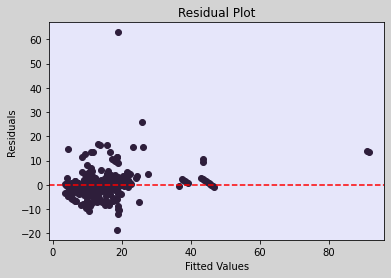

In [66]:
# Testing for Homogeneity
# Calculate the residuals
residuals9 = model9.resid

# Create the residual plot
plt.scatter(model9.fittedvalues, residuals9)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

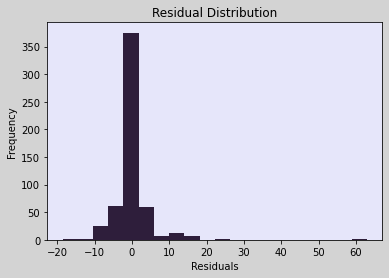

In [67]:
# Testing for residual normality
plt.hist(model9.resid, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

### Disccussion: 
Mixed Linear Methods has a slightly less log likelyhood value compared to Random Intercept and Random Slope models. Residual vs Fitted values plot shows that value despite being clumped to the left, they are randomly scattered around zero. Additionally, residuals are normally distributed. 

### Research Question 3 Answer: 
1. There is a significant relationship between Genre and Price. For books categorized as "Non Fiction," the model estimates their average Price to be 2.622 units higher compared to books categorized as "Fiction." This coefficient suggests that, on average, Non Fiction books tend to have a higher Price than Fiction books, after accounting for the other predictor variables included in the model.
2. The variable Year also has statistical significant relatinship with Price.A one-unit increase in Year is associated with a decrease of 0.412 units in Price.
3. The estimated variance of the random effect for Author is 27.290. This captures the variation in Price that is attributed to different authors not accounted for by the fixed effects.It means that there is substantial variability in Price among different authors. This means that there are significant differences in Price between books written by different authors, even after considering the fixed effects (such as Genre, User Rating, Reviews, and Year) included in the model.
4. There is a strong postive correlation between the random effect and fixed effect on the model.This suggests that certain authors tend to consistently write books belonging to the "Non Fiction" genre, while others tend to write books belonging to the "Fiction" genre.

# TEXT ANALYTICS

In [68]:
# install packages
import numpy as np # For matrix and numerical calculations; foundation of pandas
import pandas as pd # For dataframe manipulation
from collections import Counter
from datetime import datetime, date
import seaborn as sns # For visualizations and plotting
import matplotlib.pyplot as plt # For visualizations and plotting
%matplotlib inline
import json
import re
import string
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings("ignore")

In [69]:
# import .csv file
df = pd.read_csv('bestsellers with categories.csv')
# peak at first 10 rows
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [71]:
# Set the display options to show the full book name
pd.set_option('display.max_colwidth', None)

df_unique = df.drop_duplicates(subset='Name') # this line will get us only unique books

# Count the number of words in each unique book name
df_unique['Word_Count'] = df_unique['Name'].apply(lambda x: len(x.split()))

sorted_df = df_unique.sort_values(by='Word_Count', ascending=False)
sorted_df[['Name', 'Word_Count']].head(5)

,Name,Word_Count
6,A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons,24
129,"Girl, Wash Your Face: Stop Believing the Lies About Who You Are So You Can Become Who You Were Meant to Be",22
207,"Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Childrens Book)",21
243,No Easy Day: The Autobiography of a Navy Seal: The Firsthand Account of the Mission That Killed Osama Bin Laden,20
78,"Divine Soul Mind Body Healing and Transmission System: The Divine Way to Heal You, Humanity, Mother Earth, and All…",19


### Discussion:
In our dataset, the book with the longest name, considering the slashes as separate words, is "A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons". The word count for this book name is 24 words.

Please note that counting slashes as separate words can artificially increase the word count for a book title. While "A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons" may appear to be one of the lengthiest book names, it is important to consider that the inclusion of slashes contributes to the overall word count.

### Research Question 4:

### What are the most frequently occurring words in book titles and What insights do we gain from sentiment analysis?


#### Concatenating the "Name" column into a single string 

In [72]:
# Extract the "Name" column text
name_text = ' '.join(sorted_df['Name'])

# Store the "Name" column text in the book_titles variable
book_titles = name_text

print(book_titles)

A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons Girl, Wash Your Face: Stop Believing the Lies About Who You Are So You Can Become Who You Were Meant to Be Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Childrens Book) No Easy Day: The Autobiography of a Navy Seal: The Firsthand Account of the Mission That Killed Osama Bin Laden Divine Soul Mind Body Healing and Transmission System: The Divine Way to Heal You, Humanity, Mother Earth, and All… The Road to Serfdom: Text and Documents--The Definitive Edition (The Collected Works of F. A. Hayek, Volume 2) Act Like a Lady, Think Like a Man: What Men Really Think About Love, Relationships, Intimacy, and Commitment Eat This, Not That! Thousands of Simple Food Swaps that Can Save You 10, 20, 30 Pounds--or More! Game of Thrones Boxed Set: A Game of Thrones/A Clash of Kings/A Storm of Swords/A Feast for Crows The Boys in the Boat: Nine Amer

In [73]:
#Checking the length of this string
len(book_titles)

18120

book_titles are represented as a single large string (as it is now), but this huge string is not very helpful for analyzing features of the text until the string is segmented into "tokens", which include words but also hyphenated phrases or contractions.

In [74]:
#Using The word_tokenize method
example_wt_tokens = nltk.word_tokenize(book_titles) 
print("There are {0:,} words when splitting with word_tokenize.".format(len(example_wt_tokens)))
example_wt_tokens[:25]

There are 3,604 words when splitting with word_tokenize.


['A',
 'Game',
 'of',
 'Thrones',
 '/',
 'A',
 'Clash',
 'of',
 'Kings',
 '/',
 'A',
 'Storm',
 'of',
 'Swords',
 '/',
 'A',
 'Feast',
 'of',
 'Crows',
 '/',
 'A',
 'Dance',
 'with',
 'Dragons',
 'Girl']

The word_tokenize() function in NLTK (Natural Language Toolkit) is used for tokenizing a given text into individual words or tokens. Tokenization is the process of breaking down a text into smaller units, such as words or sentences, to facilitate further analysis and processing. Note that the number of total words has reduced from 27327 to 5321 tokens.

In [75]:
example_wpt_lowered = [token.lower() for token in example_wt_tokens]
unique_wpt = len(set(example_wt_tokens)) #creating count of words
unique_lowered_wpt = len(set(example_wpt_lowered))
difference = unique_wpt - unique_lowered_wpt #what are the differences

print("There are {0:,} unique words in book_titles before lowering and {1:,} after lowering,\na difference of {2} unique tokens.".format(unique_wpt,unique_lowered_wpt,difference))

There are 1,242 unique words in book_titles before lowering and 1,219 after lowering,
a difference of 23 unique tokens.


Based on the result of the word count analysis before and after lowering the text in the "book_titles" we observe a reduction in the number of unique words from 1,242 to 1,219 after lowercasing. This difference of 23 unique tokens highlights the impact of capitalization on the number of distinct words.

In [76]:
nltk.FreqDist(example_wpt_lowered).most_common(25) # most common words

[('the', 250),
 (':', 200),
 (',', 125),
 ('of', 112),
 ('(', 106),
 (')', 105),
 ('a', 99),
 ('and', 90),
 ('book', 61),
 ('to', 54),
 ('for', 35),
 ("'s", 30),
 ('in', 24),
 ('you', 20),
 ('coloring', 20),
 ('that', 18),
 ('novel', 18),
 ('man', 15),
 ('edition', 14),
 ('an', 14),
 ('with', 13),
 ('your', 13),
 ('life', 13),
 ('love', 13),
 ('fifty', 13)]

The presence of the word "the" as the most common word in the book titles is not surprising. To gain deeper insights from the analysis, it is essential to apply stop words removal.

In [77]:
english_stopwords = nltk.corpus.stopwords.words('english') #common English language stop words

In [78]:
list(string.punctuation)[:10]

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*']

In [79]:
all_stopwords = english_stopwords + list(string.punctuation) + ['–','``','’',"'s", "''", "book"] # added a few extra things as stop words

In [80]:
#what you see after removing the stop words
common_words_in_book_titles_no_stopwords = []

for word in example_wpt_lowered:
    if word.lower() not in all_stopwords:
        common_words_in_book_titles_no_stopwords.append(word.lower())

fdist_no_stopwords = nltk.FreqDist(common_words_in_book_titles_no_stopwords)
fdist_no_stopwords.most_common(15)

[('coloring', 20),
 ('novel', 18),
 ('man', 15),
 ('edition', 14),
 ('life', 13),
 ('love', 13),
 ('fifty', 13),
 ('shades', 13),
 ('series', 13),
 ('dog', 13),
 ('harry', 13),
 ('potter', 13),
 ('guide', 12),
 ('kid', 12),
 ('killing', 11)]

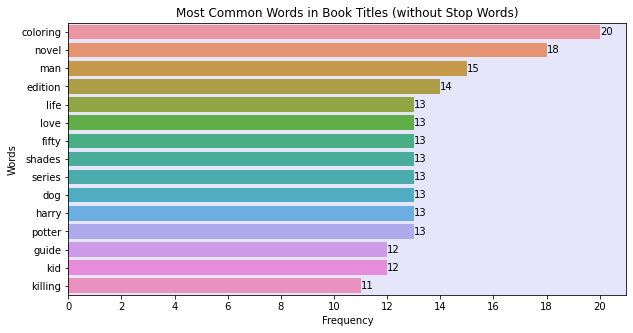

In [81]:
# Convert frequency distribution to a DataFrame
data = {'Word': [], 'Frequency': []}
for word, freq in fdist_no_stopwords.most_common(15):
    data['Word'].append(word)
    data['Frequency'].append(freq)
df = pd.DataFrame(data)

# Create horizontal bar plot using Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Word', data=df, orient='h')
plt.title('Most Common Words in Book Titles (without Stop Words)')
plt.xlabel('Frequency')
plt.ylabel('Words')

# Adjust frequency axis
plt.xticks(np.arange(0, max(df['Frequency']) + 1, 2))

# Add labels to each bar
for i, freq in enumerate(df['Frequency']):
    plt.text(freq, i, str(freq), va='center')

plt.show()


### Sentiment Analysis

In [82]:
sorted_df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Word_Count
6,A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons,George R. R. Martin,4.7,19735,30,2014,Fiction,24
129,"Girl, Wash Your Face: Stop Believing the Lies About Who You Are So You Can Become Who You Were Meant to Be",Rachel Hollis,4.6,22288,12,2018,Non Fiction,22
207,"Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Childrens Book)",Jill Twiss,4.9,11881,13,2018,Fiction,21
243,No Easy Day: The Autobiography of a Navy Seal: The Firsthand Account of the Mission That Killed Osama Bin Laden,Mark Owen,4.6,8093,14,2012,Non Fiction,20
78,"Divine Soul Mind Body Healing and Transmission System: The Divine Way to Heal You, Humanity, Mother Earth, and All…",Zhi Gang Sha,4.6,37,6,2009,Non Fiction,19


In [83]:
# The code initializes the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analyzer. 
#VADER is a lexicon and rule-based sentiment analysis tool specifically designed to analyze sentiments in text. 
#It assigns sentiment scores to individual words and combines them to generate an overall sentiment score for a given text.
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the "Name" column
sentiments = sorted_df["Name"].apply(lambda x: sia.polarity_scores(x))


sorted_df["Sentiment"] = sentiments

sorted_df.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre,Word_Count,Sentiment
6,A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons,George R. R. Martin,4.7,19735,30,2014,Fiction,24,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
129,"Girl, Wash Your Face: Stop Believing the Lies About Who You Are So You Can Become Who You Were Meant to Be",Rachel Hollis,4.6,22288,12,2018,Non Fiction,22,"{'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound': -0.6124}"
207,"Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Childrens Book)",Jill Twiss,4.9,11881,13,2018,Fiction,21,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
243,No Easy Day: The Autobiography of a Navy Seal: The Firsthand Account of the Mission That Killed Osama Bin Laden,Mark Owen,4.6,8093,14,2012,Non Fiction,20,"{'neg': 0.262, 'neu': 0.625, 'pos': 0.113, 'compound': -0.5859}"
78,"Divine Soul Mind Body Healing and Transmission System: The Divine Way to Heal You, Humanity, Mother Earth, and All…",Zhi Gang Sha,4.6,37,6,2009,Non Fiction,19,"{'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'compound': 0.802}"


In [84]:
positive_df = sorted_df.sort_values(by="Sentiment", key=lambda x: x.apply(lambda d: d["compound"]), ascending=False) # Sort the DataFrame by the "compound" sentiment score in descending order
negative_df = sorted_df.sort_values(by="Sentiment", key=lambda x: x.apply(lambda d: d["compound"]), ascending=True) # ascending order

# Select the top 5 rows 
top_5_positive_sentiments = positive_df.head(5)
top_5_negative_sentiments = negative_df.head(5)
top_5_positive_sentiments[["Name", "Sentiment"]]

,Name,Sentiment
138,Good Days Start With Gratitude: A 52 Week Guide To Cultivate An Attitude Of Gratitude: Gratitude Journal,"{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.9153}"
152,"Happy, Happy, Happy: My Life and Legacy as the Duck Commander","{'neg': 0.0, 'neu': 0.419, 'pos': 0.581, 'compound': 0.9022}"
14,"Act Like a Lady, Think Like a Man: What Men Really Think About Love, Relationships, Intimacy, and Commitment","{'neg': 0.0, 'neu': 0.499, 'pos': 0.501, 'compound': 0.9014}"
176,"I Am Confident, Brave & Beautiful: A Coloring Book for Girls","{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.8885}"
374,The Five Love Languages: How to Express Heartfelt Commitment to Your Mate,"{'neg': 0.0, 'neu': 0.466, 'pos': 0.534, 'compound': 0.8834}"


In [85]:
top_5_negative_sentiments[["Name", "Sentiment"]]

,Name,Sentiment
201,Killing Reagan: The Violent Assault That Changed a Presidency (Bill O'Reilly's Killing Series),"{'neg': 0.673, 'neu': 0.327, 'pos': 0.0, 'compound': -0.9552}"
200,Killing Patton: The Strange Death of World War II's Most Audacious General (Bill O'Reilly's Killing Series),"{'neg': 0.601, 'neu': 0.327, 'pos': 0.072, 'compound': -0.9532}"
198,Killing Lincoln: The Shocking Assassination that Changed America Forever (Bill O'Reilly's Killing Series),"{'neg': 0.631, 'neu': 0.369, 'pos': 0.0, 'compound': -0.9468}"
202,Killing the Rising Sun: How America Vanquished World War II Japan (Bill O'Reilly's Killing Series),"{'neg': 0.514, 'neu': 0.486, 'pos': 0.0, 'compound': -0.9287}"
196,Killing Jesus (Bill O'Reilly's Killing Series),"{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.8689}"


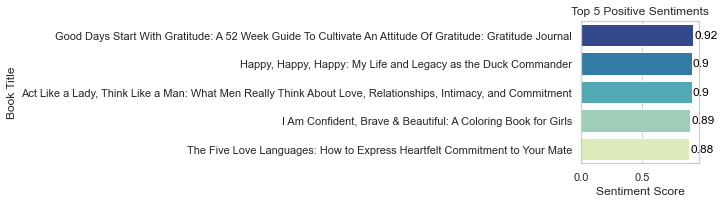

In [86]:

sns.set(style="whitegrid")

# Create a bar chart for positive sentiments
plt.figure(figsize=(10, 3))
ax = sns.barplot(x=top_5_positive_sentiments["Sentiment"].apply(lambda x: x["compound"]),
                 y=top_5_positive_sentiments["Name"],
                 palette="YlGnBu_r")

# Add value labels to each bar
for i, v in enumerate(top_5_positive_sentiments["Sentiment"].apply(lambda x: x["compound"])):
    ax.text(v + 0.01, i, str(round(v, 2)), color="black", va="center")

# Set labels and title
plt.xlabel("Sentiment Score")
plt.ylabel("Book Title")
plt.title("Top 5 Positive Sentiments")

plt.tight_layout()
plt.show()

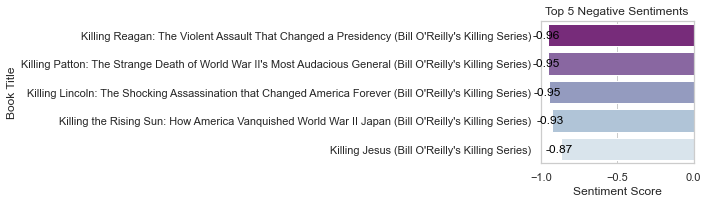

In [87]:

sns.set(style="whitegrid")

# Create a bar chart for negative sentiments
plt.figure(figsize=(10, 3))
ax = sns.barplot(x=top_5_negative_sentiments["Sentiment"].apply(lambda x: x["compound"]),
                 y=top_5_negative_sentiments["Name"],
                 palette="BuPu_r")

# Add value labels to each bar
for i, v in enumerate(top_5_negative_sentiments["Sentiment"].apply(lambda x: x["compound"])):
    ax.text(v - 0.1, i, str(round(v, 2)), color="black", va="center")

# Set labels and title
plt.xlabel("Sentiment Score")
plt.ylabel("Book Title")
plt.title("Top 5 Negative Sentiments")

plt.tight_layout()
plt.show()


In [88]:
# Count the number of books with negative compound sentiment values
negative_count = sorted_df[sorted_df["Sentiment"].apply(lambda x: x["compound"]) < 0].shape[0]

# Count the number of books with positive compound sentiment values (ranging from 0 to 1)
positive_count = sorted_df[sorted_df["Sentiment"].apply(lambda x: 0 <= x["compound"] <= 1)].shape[0]


print("Number of books with negative compound sentiment values:", negative_count)
print("Number of books with positive compound sentiment values:", positive_count)

Number of books with negative compound sentiment values: 69
Number of books with positive compound sentiment values: 282


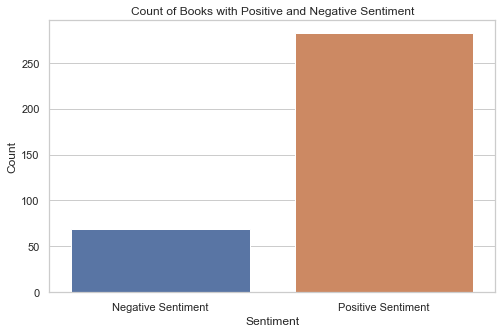

In [89]:
plt.figure(figsize=(8, 5))
sns.barplot(x=["Negative Sentiment", "Positive Sentiment"], y=[negative_count, positive_count])
plt.title('Count of Books with Positive and Negative Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### Research Question 4 Answer:



**Most Frequent Words in Book Titles:**

After removing stopwords from the book titles of the Amazon Top 50 Bestselling Books from 2009 to 2019, the most frequently occurring words give us insights into prevalent themes and genres. The top five most common words are:

1. Coloring: The presence of "coloring" suggests the popularity of coloring books.
2. Novel: The word "novel" indicates a significant number of fictional works within the dataset.
3. Man: The frequent occurrence of "man" suggests the inclusion of books about a men.
4. Edition: The presence of "edition" highlights the inclusion of different editions of books.
5. Life: The inclusion of "life" emphasizes the presence of books centered around life experiences, self-help, biographies, and personal growth.
6. Love: The high frequency of the word "love" suggests that romance and love-themed books were prevalent during this period.


These findings highlight the dominant themes and genres that contributed to the success and popularity of the top-selling books during the given timeframe.

**Sentiment Analysis:**

Based on sentiment analysis, the top five books with positive sentiment scores are:

1. "Good Days Start With Gratitude: A 52 Week Guide To Cultivate An Attitude Of Gratitude: Gratitude Journal"
2. "Happy, Happy, Happy: My Life and Legacy as the Duck Commander"
3. "Act Like a Lady, Think Like a Man: What Men Really Think About Love, Relationships, Intimacy, and Commitment"
4. "I Am Confident, Brave & Beautiful: A Coloring Book for Girls"
5. "The Five Love Languages: How to Express Heartfelt Commitment to Your Mate"

These books likely received positive sentiment scores due to their content and subject matter, which promote positivity, personal growth, empowerment, and understanding in different aspects of life, such as gratitude, relationships, and self-confidence.

On the other hand, the top five books with negative sentiment scores are:

1. "Killing Reagan: The Violent Assault That Changed a Presidency (Bill O'Reilly's Killing Series)"
2. "Killing Patton: The Strange Death of World War II's Most Audacious General (Bill O'Reilly's Killing Series)"
3. "Killing Lincoln: The Shocking Assassination that Changed America Forever (Bill O'Reilly's Killing Series)"
4. "Killing the Rising Sun: How America Vanquished World War II Japan (Bill O'Reilly's Killing Series)"
5. "Killing Jesus (Bill O'Reilly's Killing Series)"	

These books likely contain events or topics associated with negative or intense emotions, such as violent incidents or shocking historical events.

In total, out of the analyzed books, 282 books received positive compound sentiment scores ranging from 0 to 1, while 69 books received negative compound sentiment scores. This indicates that the majority of the bestselling books during that period focused on positive emotions and themes.

